# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Arsh Kandola

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [21]:
import requests
from bs4 import BeautifulSoup
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip list
print('All prereqs installed.')

Package                       Version
----------------------------- -----------
absl-py                       2.0.0
aiofiles                      22.1.0
aiosqlite                     0.18.0
anaconda-client               1.11.0
anaconda-navigator            2.1.4
annotated-types               0.5.0
anyio                         3.6.2
appnope                       0.1.3
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asttokens                     2.2.1
astunparse                    1.6.3
async-lru                     2.0.4
attrs                         22.1.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
beautifulsoup4                4.11.1
black                         23.9.1
bleach                        6.0.0
blis                          0.7.11
brotlipy                      0.7.0
build   

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [22]:
import requests 

url="https://www.simplilearn.com/data-science-and-ai-article"

response= requests.get(url)

if response.status_code ==200:
    html_content=response.text
    
    with open("article.html","w", encoding="utf-8") as f:
        f.write(html_content)
        
        print("atricle saved as 'HTML'")
else:
        print("article failed.status code:", response.status_code)



atricle saved as 'HTML'


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [23]:
from bs4 import BeautifulSoup

with open("article.html","r",encoding="utf-8") as file:
    html_content=file.read()
    
soup=BeautifulSoup(html_content,"html.parser")

article_element=soup.find("article")

article_text=article_element.get_text()

sentiment = TextBlob(article_text).sentiment

print("Sentiment Polarity Score:", sentiment.polarity)

sentences=article_text.split('.')
num_sentences=len(sentences)

print("Number of Sentences:", num_sentences)


Sentiment Polarity Score: 0.04349065749065751
Number of Sentences: 189


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [24]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(article_element.get_text())
from collections import Counter

def important_token(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.text.lower() for token in doc if important_token(token)]
word_freq = Counter(map(str,interesting_tokens))
common_token = (word_freq.most_common(5))

print("Tokens and Their Frequencies :")
print(common_token)
common_tokens = set()
for token, freq in word_freq.most_common(5):
    common_tokens.add(token)


Tokens and Their Frequencies :
[('data', 133), ('ai', 72), ('science', 60), ('intelligence', 41), ('artificial', 33)]


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [25]:
common_lemmas = [token.lemma_.lower() for token in doc if important_token(token)]
lemma_freq = Counter(common_lemmas)
common_lemmas= lemma_freq.most_common(5)

print("Lemmas Frequencies :")
print(common_lemmas)
common_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    common_lemmas.add(lemma)
    
print("5 Most Frequent Lemmas ", common_lemmas)

Lemmas Frequencies :
[('datum', 87), ('ai', 72), ('science', 60), ('data', 46), ('intelligence', 41)]
5 Most Frequent Lemmas  {'data', 'intelligence', 'ai', 'datum', 'science'}


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

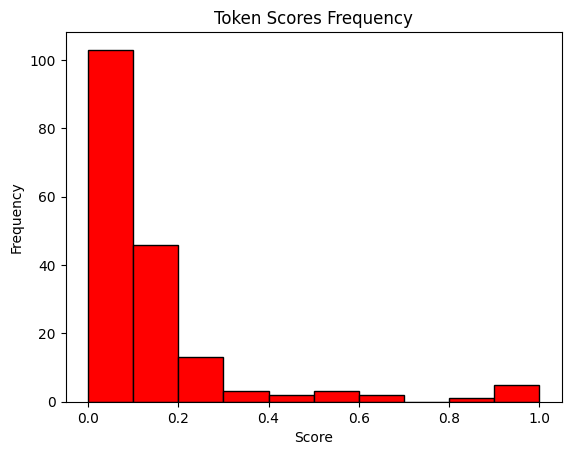

In [26]:
sentences = list(doc.sents)
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in common_tokens:
            count1+= 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    
tokenscores = []
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in common_tokens:
            count1 += 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    score = count1 / count2 if count2 > 0 else 0
    tokenscores.append(score)

plt.hist(tokenscores, color='red',edgecolor='black')
plt.title('Token Scores Frequency')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

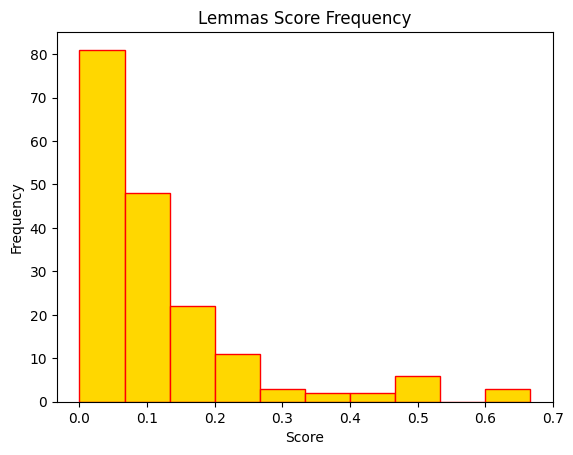

In [27]:
sentences = list(doc.sents)
for sentence in sentences:
    count1= 0
    for lemma in sentence:
        if lemma.lemma_.lower() in common_lemmas:
            count1+= 1
    count2 = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')

lemmascores = []

for sentence in sentences:
    count1 = 0
    for token in sentence:
        if token.lemma_.lower() in common_lemmas:
            count1 += 1
    
    count2 = 0
    for token in sentence:
        if not (token.is_space or token.is_punct):
            count2 += 1
    

    score = count1 / count2 if count2 > 0 else 0
    lemmascores.append(score)

plt.hist(lemmascores,color='gold',edgecolor='red')
plt.title('Lemmas Score Frequency')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens):0.25
* Cutoff Score (lemmas): 0.25

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [28]:
import numpy as np
scores_array = np.array(tokenscores)
cutoff_score_tokens = np.percentile(scores_array, 90)
print("Cutoff Score (tokens):", cutoff_score_tokens)

import numpy as np
scores_array = np.array(lemmascores)
cutoff_score_lemmas = np.percentile(scores_array, 90)
print("Cutoff Score (lemmas):", cutoff_score_lemmas)

Cutoff Score (tokens): 0.25900000000000034
Cutoff Score (lemmas): 0.25


8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [29]:
url = "https://www.simplilearn.com/data-science-and-ai-article"

response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

paragraphs = soup.find_all("p", class_=None)

article_content = "\n".join([p.text for p in paragraphs if p.text.strip()])  # Filter out empty paragraphs

nlp = spacy.load('en_core_web_sm')

doc = nlp(article_content)

cutoff_score_tokens = 0.25

summary_sentences = []

for sent in doc.sents:
    token_score = TextBlob(sent.text).sentiment.polarity
    if token_score > cutoff_score_tokens:
        summary_sentences.append(sent.text.strip())

if len(summary_sentences) > 6:
    summary_sentences = summary_sentences[:6]

summary_blob = TextBlob(" ".join(summary_sentences))
summary_polarity_score = summary_blob.sentiment.polarity

print("Polarity Score:", summary_polarity_score)

print("Number of Sentences:", len(summary_sentences))

Polarity Score: 0.47272727272727283
Number of Sentences: 6


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [30]:
url = "https://www.simplilearn.com/data-science-and-ai-article"

response = requests.get(url)

soup = BeautifulSoup(response.content, "html.parser")

paragraphs = soup.find_all("p", class_=None)

article_content = "\n".join([p.text for p in paragraphs if p.text.strip()])  

nlp = spacy.load('en_core_web_sm')

doc = nlp(article_content)

cutoff_score_lemmas = 0.25

summary_sentences = []

for sent in doc.sents:
    lemma_score = TextBlob(sent.text).sentiment.polarity
    if lemma_score > cutoff_score_lemmas and len(summary_sentences) < 6:
        summary_sentences.append(sent.text.strip())

if len(summary_sentences) == 6:
    print("Summary:")
    print('\n'.join(summary_sentences))
else:
    print("Unable to generate a summary with exactly 6 sentences.")

Summary:
Trading algorithms powered by AI can sift through market data instantaneously, pinpointing opportunities for trades and conducting them swiftly and precisely.
AI-powered self-driving cars utilize advanced sensors, computer vision, and ML algorithms to perceive their environment, recognize traffic signs, and respond to changing road conditions, enhancing road safety and efficiency.
AI seeks to simulate human-like intelligence in machines to perform tasks autonomously, aligning with data science's broader goal of leveraging data to derive actionable insights.
AI development often involves collaboration between data scientists, computer scientists, and domain experts to develop intelligent systems capable of autonomous decision-making.
Thanks to the course teachers and others associated with designing such a wonderful learning experience.
A.Anthony DavisSimplilearn has one of the best programs available online to earn real-world skills that are in demand worldwide.


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [31]:
doc = nlp(article_text)
sentences = [sent.text.strip() for sent in doc.sents]

your_cutoff_score = 0.25
summary_sentences = []

for sentence in sentences:
    blob = TextBlob(sentence)
    if blob.sentiment.polarity > your_cutoff_score:
        summary_sentences.append(sentence)

summary_text = ' '.join(summary_sentences)
summary_blob = TextBlob(summary_text)
summary_polarity_score = summary_blob.sentiment.polarity

print("Polarity Score (Lemma Scores):", summary_polarity_score)
num_summary_sentences = len(summary_sentences)
print("Number of Sentences:", num_summary_sentences)

Polarity Score (Lemma Scores): 0.4733590733590733
Number of Sentences: 19


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

Initial polarity score= 0.05
summary polarity score= 0.47

I indeed have a very very big difference and I believe it is becaUse somewhere on my summary code I may have not calculated it correctly because the summary polarity score apparently is almost ten times bigger then the initial polarity score also it could be that I chose the wrong cutoff score to use. 

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Personally I would say that the summary from the tokens would be better simply because it has less sentences because the Lemma score summary has 19 sentences.